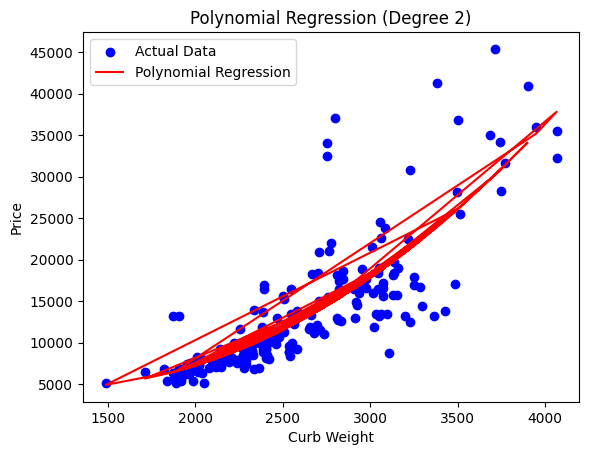

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Step 1: Load Data
data = pd.read_csv('/content/Automobile_data.csv')

# Step 2: Handle Missing Data (if any)
# Replace '?' with NaN and then impute missing values with the mean
data.replace('?', np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
data[['curb-weight', 'price']] = imputer.fit_transform(data[['curb-weight', 'price']])

# Step 3: Select Features and Target Variable
X = data[['curb-weight']].values  # Independent variable (curb-weight)
y = data['price'].values          # Dependent variable (price)

# Step 4: Feature Scaling (Optional for polynomial regression)
# Polynomial features
poly = PolynomialFeatures(degree=2)  # Choose the degree of the polynomial
X_poly = poly.fit_transform(X)

# Step 5: Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Step 6: Predict Values
y_pred = model.predict(X_poly)

# Step 7: Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')  # Actual data points
plt.plot(X, y_pred, color='red', label='Polynomial Regression')  # Predicted curve
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.legend()
plt.show()
